In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

Using TensorFlow backend.


In [3]:
df_train = pd.read_csv('uoft_ai_class_1/final_project/train.csv')

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# get the non-numerical columns

cols = df_train.columns
num_cols = df_train._get_numeric_data().columns
list(set(cols) - set(num_cols))

['Utilities',
 'GarageCond',
 'ExterCond',
 'MasVnrType',
 'KitchenQual',
 'LotShape',
 'Neighborhood',
 'MiscFeature',
 'FireplaceQu',
 'RoofStyle',
 'BldgType',
 'Condition1',
 'LandContour',
 'CentralAir',
 'HouseStyle',
 'LotConfig',
 'RoofMatl',
 'PavedDrive',
 'GarageFinish',
 'Functional',
 'HeatingQC',
 'GarageType',
 'BsmtCond',
 'Fence',
 'BsmtFinType2',
 'Street',
 'Exterior2nd',
 'GarageQual',
 'BsmtQual',
 'Foundation',
 'Alley',
 'ExterQual',
 'Condition2',
 'MSZoning',
 'BsmtExposure',
 'BsmtFinType1',
 'Exterior1st',
 'SaleCondition',
 'SaleType',
 'Electrical',
 'Heating',
 'LandSlope',
 'PoolQC']

Correlation between columns

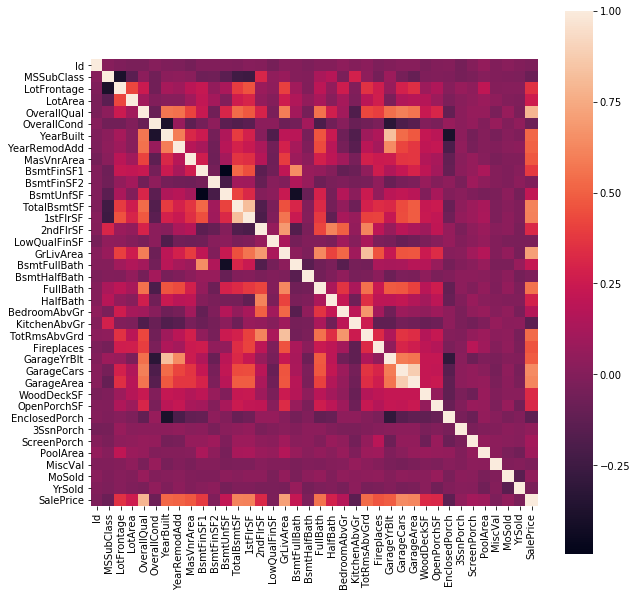

In [7]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True)

Distribution of sale prices

C:\Users\vladimir\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


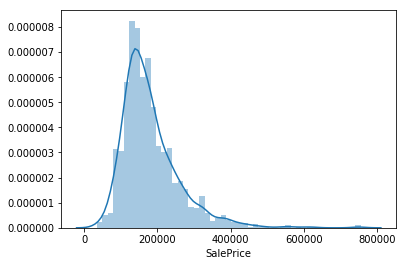

In [8]:
sns.distplot(df_train['SalePrice'])

sale price / year built chart

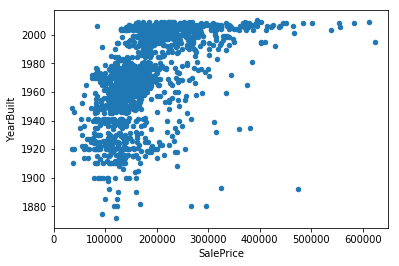

In [9]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
p = data.plot.scatter(x='SalePrice', y='YearBuilt', xlim=(0,650000))

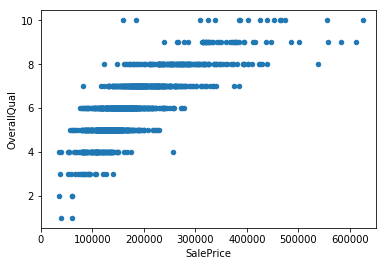

In [10]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
p = data.plot.scatter(x='SalePrice', y='OverallQual', xlim=(0,650000))

In [11]:
sale_price = df_train['SalePrice']
df_train.drop(['Id', 'SalePrice'], inplace=True, axis=1)

Convert categories to one-hot-encodings

In [12]:
df_train_one_hot = pd.get_dummies(df_train)

len(df_train_one_hot.columns)

288

Scale the dataframe

In [13]:
from sklearn import preprocessing

x = df_train_one_hot.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_train_one_hot_2 = pd.DataFrame(x_scaled)

Simple Neural Network

In [19]:
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=288))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.5))

model.add(Dense(1))

optimizer = tf.train.RMSPropOptimizer(0.01)
model.compile (loss = 'mse', optimizer = optimizer, metrics = ['mse'])

model.fit(df_train_one_hot_2, sale_price, epochs=100, batch_size=16)

Epoch 1/100
1460/1460 [==============================] - 2s 1ms/step - loss: 39031853089.6658 - mean_squared_error: 39031853089.6658
Epoch 2/100
1460/1460 [==============================] - 1s 445us/step - loss: 39003088985.7753 - mean_squared_error: 39003088985.7753
Epoch 3/100
1460/1460 [==============================] - 1s 432us/step - loss: 38953161253.8740 - mean_squared_error: 38953161253.8740
Epoch 4/100
1460/1460 [==============================] - 1s 436us/step - loss: 38884363738.1260 - mean_squared_error: 38884363738.1260
Epoch 5/100
1460/1460 [==============================] - 1s 449us/step - loss: 38795659920.4822 - mean_squared_error: 38795659920.4822
Epoch 6/100
1460/1460 [==============================] - 1s 442us/step - loss: 38686741265.5342 - mean_squared_error: 38686741265.5342
Epoch 7/100
1460/1460 [==============================] - 1s 443us/step - loss: 38558561355.7479 - mean_squared_error: 38558561355.7479
Epoch 8/100
1460/1460 [==============================] - 

1460/1460 [==============================] - 1s 434us/step - loss: 12991267377.0959 - mean_squared_error: 12991267377.0959
Epoch 62/100
1460/1460 [==============================] - 1s 423us/step - loss: 12489046468.9096 - mean_squared_error: 12489046468.9096
Epoch 63/100
1460/1460 [==============================] - 1s 434us/step - loss: 11995030028.6247 - mean_squared_error: 11995030028.6247
Epoch 64/100
1460/1460 [==============================] - 1s 434us/step - loss: 11509464136.9425 - mean_squared_error: 11509464136.9425
Epoch 65/100
1460/1460 [==============================] - 1s 431us/step - loss: 11044235566.9918 - mean_squared_error: 11044235566.9918
Epoch 66/100
1460/1460 [==============================] - 1s 428us/step - loss: 10586587260.8438 - mean_squared_error: 10586587260.8438
Epoch 67/100
1460/1460 [==============================] - 1s 431us/step - loss: 10160271208.5041 - mean_squared_error: 10160271208.5041
Epoch 68/100
1460/1460 [==============================] - 1s 